The G1 Climax is an annual Japanase wrestling tournament that's held every summer over 20 days. Rather than a simple knockout tournament it's a league made up two blocks each consisting of 20 wrestlers. The winner of each block then face off and the winner goes to headline wrestle kingdom in January

Let's start off with importing all the relevant libraries which will be updated as we go

In [59]:
!pip install plotly

  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\shahnur islam\AppData\Local\pip\Cache\wheels\82\8a\9a\3c849456631272e7077301fa6385226c2a507dd1b9f9720e60
Successfully built plotly
  Found existing installation: nbformat 4.1.0
    Uninstalling nbformat-4.1.0:
      Successfully uninstalled nbformat-4.1.0


    DEPRECATION: Uninstalling a distutils installed project (nbformat) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.


In [60]:
import pandas as pd
import math
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import decimal
import datetime
import plotly.plotly as py
import plotly.graph_objs as go
sns.set_style('white')

Here are some potential things to look at:
Who on average has the longest time?
Does a wrestler style, weight, momemntum make a diffenece?
Does Dave Metlzer's rating correlate with match time or any other variables?
If they won the last match are they going to win the next one?


Let's start off by reading the csv file with the wrestler's names and which block they're in.

In [2]:
df = pd.read_csv("G1 Competitors.csv")

In [42]:
df.info()#use .info() to give us information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
A Block    10 non-null object
B Block    10 non-null object
dtypes: object(2)
memory usage: 240.0+ bytes


The dataframe only contain 10 entries with No null objects which is good to see. We can just type in **df** into the console and see what the whole dataframe looks like. Of course if we had more rows we wouldn't be able to do this and would use *df.head()*

In [43]:
df

,A Block,B Block
0,Hiroshi Tanahashi,Kazuchika Okada
1,Togi Makabe,Toru Yano
2,Tomohiro Ishii,Satoshi Kojima
3,Hirooki Goto,Michael Elgin
4,YOSHI-HASHI,Juice Robinson
5,Bad Luck Fale,Tama Tonga
6,Yuji Nagata,SANADA
7,Zack Sabre Jr.,EVIL
8,Kota Ibushi,Minoru Suzuki
9,Tetsuya Naito,Kenny Omega


I noticed that some of the wrestler's name have capitals while others don't, let's seperate these into two blocks and make sure we convert all strings to uppercase so formatting is consistent

In [44]:
A_Block = pd.DataFrame(df['A Block'].str.upper())
A_Block.columns = ['Wrestler']
B_Block = pd.DataFrame(df['B Block'].str.upper())
B_Block.columns = ['Wrestler']

Ok we've now got two seperate dataframes called *A_Block* & *B_Block*. Let's use these two dataframes as our league table for the tournament blocks. We'll add the usual columns you'd see in any sports league **'Matches','Wins','Losses','Draws'**. 

I'm going to include **'Match Time'** as the total time a wrestler has wrestled. I'm also going to add another called **'DMR'**, which stand Dave Meltzer Rating who is a 30 year wrestling journalist whose ratings of matches are out of five and is held in high standing

In [45]:
A_Block['Matches'] = np.NAN
A_Block['Wins'] = np.NAN
A_Block['Losses'] = np.NAN
A_Block['Draws'] = np.NAN
A_Block['Points'] = np.NAN
A_Block['Match_Time'] = np.NAN
A_Block['DMR'] = 0.00
B_Block['Matches'] = np.NAN
B_Block['Wins'] = np.NAN
B_Block['Losses'] = np.NAN
B_Block['Draws'] = np.NAN
B_Block['Points'] = np.NAN
B_Block['Match_Time'] = np.NAN
B_Block['DMR'] = 0.00

In [48]:
A_Block.head(1)

,Wrestler,Matches,Wins,Losses,Draws,Points,Match_Time,DMR
0,HIROSHI TANAHASHI,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [49]:
B_Block.head(1)

,Wrestler,Matches,Wins,Losses,Draws,Points,Match_Time,DMR
0,KAZUCHIKA OKADA,NaN,NaN,NaN,NaN,NaN,NaN,0.0


How many potential matches per block?
Using the old permuations formula

In [9]:
math.factorial(10)/(math.factorial(2)*math.factorial(10-2))

45.0

Ok there are 45 possible matches, I was going to write a custom function to list all these out but the python community is so large someone has already done what you need. Luckily they have and it comes from the library itertools. We use the function combinations as we're looking for all unique combinations and not permutations. The combination takes a list so we can't simply pass in the data frame and need to select the Wrestler column as a series. W

In [10]:
A_matches = pd.DataFrame.from_records(list(itertools.combinations(A_Block['Wrestler'],2)), columns = ['Wrestler 1', 'Wrestler 2'])
B_matches = pd.DataFrame.from_records(list(itertools.combinations(B_Block['Wrestler'],2)), columns = ['Wrestler 1', 'Wrestler 2'])
A_matches['Winner'] = np.NAN
B_matches['Winner'] = np.NAN
A_matches['Loser'] = np.NAN
B_matches['Loser'] = np.NAN
A_matches['Match'] = 1
B_matches['Match'] = 1
B_matches['Match_Time'] = np.NAN
A_matches['Match_Time'] = np.NAN
B_matches['Draw'] = False
A_matches['Draw'] = False
B_matches['DMR'] = 0.00
A_matches['DMR'] = 0.00

In [50]:
A_matches.head(5)

,Wrestler 1,Wrestler 2,Winner,Loser,Match,Match_Time,Draw,DMR
0,HIROSHI TANAHASHI,TOGI MAKABE,HIROSHI TANAHASHI,TOGI MAKABE,1,13:34,False,3.50
1,HIROSHI TANAHASHI,TOMOHIRO ISHII,HIROSHI TANAHASHI,TOMOHIRO ISHII,1,23:30,False,4.50
2,HIROSHI TANAHASHI,HIROOKI GOTO,HIROSHI TANAHASHI,HIROOKI GOTO,1,1:22,False,3.25
3,HIROSHI TANAHASHI,YOSHI-HASHI,HIROSHI TANAHASHI,YOSHI-HASHI,1,13:34,False,3.75
4,HIROSHI TANAHASHI,BAD LUCK FALE,HIROSHI TANAHASHI,BAD LUCK FALE,1,11:05,False,3.50


In [51]:
B_matches.head(5)

,Wrestler 1,Wrestler 2,Winner,Loser,Match,Match_Time,Draw,DMR
0,KAZUCHIKA OKADA,TORU YANO,KAZUCHIKA OKADA,TORU YANO,1,10:31,False,3.25
1,KAZUCHIKA OKADA,SATOSHI KOJIMA,KAZUCHIKA OKADA,SATOSHI KOJIMA,1,15:26,False,4.25
2,KAZUCHIKA OKADA,MICHAEL ELGIN,KAZUCHIKA OKADA,MICHAEL ELGIN,1,25:49,False,4.75
3,KAZUCHIKA OKADA,JUICE ROBINSON,KAZUCHIKA OKADA,JUICE ROBINSON,1,20:29,False,3.50
4,KAZUCHIKA OKADA,TAMA TONGA,KAZUCHIKA OKADA,TAMA TONGA,1,11:22,False,3.25


Ok we now have a table of the potential matches, I decided to write a quick function to update the dataframe with the results rather than updating each row manually. I didn't want to type out the full names either as the spellings of Japanese names can be quite hard. So the function does a partial match and prints out the names it's matched as a check

In [52]:
def updateresults(df,winner,loser, time, DMR, draw = False):#We want to find the index for the match for these two wrestlers
    winner = winner.upper() #Tidy up the names
    loser = loser.upper()
    # Search for them in the results table and return their position
    #I really should an error handler but I'm being lazy and this function is a one time use
    w1 = list(df[df['Wrestler 1'].str.contains(winner)].index) 
    w2 = list(df[df['Wrestler 2'].str.contains(winner)].index)
    w3 = w1 + w2
    if not w1:
        winner = df.iloc[w2[0],1]
    else:
        winner = df.iloc[w1[0],0]
    
    l1 = list(df[df['Wrestler 1'].str.contains(loser)].index)
    l2 = list(df[df['Wrestler 2'].str.contains(loser)].index)
    l3 = l1 + l2
    if not l1:
        loser = df.iloc[l2[0],1]
    else:
        loser = df.iloc[l1[0],0]
    i = list(set(w3).intersection(l3))
    i = i[0]
    print(winner + ',' +loser)
    df.iloc[i,5] = time
    df.iloc[i,7] = DMR
    #if it's draw add none to winner & loser and turn the draw value to True
    if draw == False:
        df.iloc[i,2] = winner
        df.iloc[i,3] = loser
    else:
        df.iloc[i,2] = 'None'
        df.iloc[i,3] = 'None'
        df.iloc[i,6] = True       
    updatetable()
 



In [53]:
def updatetable():# Function to update the table standings after match results
    global A_Block
    global B_Block
    cols = ['Matches','Wins','Losses','Draws','Points']
    
    A_Block['Wins'] = A_Block['Wrestler'].map(A_matches['Winner'].value_counts())
    A_Block['Losses'] = A_Block['Wrestler'].map(A_matches['Loser'].value_counts())
    x = A_matches.loc[A_matches.Draw == True, ['Wrestler 1','Wrestler 2']]
    Draws = (pd.concat([x['Wrestler 1'],x['Wrestler 2']]))
    A_Block['Draws'] = A_Block['Wrestler'].map(Draws.value_counts())
    A_Block = A_Block.fillna(0)#replace the nan's with zeroes so we can tally later
    A_Block['Matches'] = A_Block['Wins'] + A_Block['Losses'] + A_Block['Draws']
    A_Block['Points'] = A_Block['Wins']*2 + A_Block['Draws']
    a=A_matches[['Wrestler 1','DMR']]
    b=A_matches[['Wrestler 2','DMR']]
    a.columns = ['Wrestler','DMR']
    b.columns = ['Wrestler','DMR']
    c = [a,b]
    d = pd.concat(c)
    ratings  = d.groupby('Wrestler').mean().reset_index()
    A_Block['DMR'] = A_Block['Wrestler'].map(ratings.set_index('Wrestler')['DMR'])
    A_Block = A_Block.sort_values(['Points'],ascending=False).reset_index(drop=True)
    A_Block[cols] = A_Block[cols].applymap(np.int64)
    
    
    
    B_Block['Wins'] = B_Block['Wrestler'].map(B_matches['Winner'].value_counts())
    B_Block['Losses'] = B_Block['Wrestler'].map(B_matches['Loser'].value_counts())
    x =B_matches.loc[B_matches.Draw == True, ['Wrestler 1','Wrestler 2']]
    Draws = (pd.concat([x['Wrestler 1'],x['Wrestler 2']]))
    B_Block['Draws'] = B_Block['Wrestler'].map(Draws.value_counts())    
    B_Block = B_Block.fillna(0)#replace the nan's with zeroes so we can tally later
    B_Block['Matches'] = B_Block['Wins'] + B_Block['Losses'] + B_Block['Draws']
    B_Block['Points'] = B_Block['Wins']*2 + B_Block['Draws']
    a=B_matches[['Wrestler 1','DMR']]
    b=B_matches[['Wrestler 2','DMR']]
    a.columns = ['Wrestler','DMR']
    b.columns = ['Wrestler','DMR']
    c = [a,b]
    d = pd.concat(c)
    ratings  = d.groupby('Wrestler').mean().reset_index()
    B_Block['DMR'] = B_Block['Wrestler'].map(ratings.set_index('Wrestler')['DMR'])
    B_Block = B_Block.sort_values(['Points'],ascending=False).reset_index(drop=True)
    B_Block[cols] = B_Block[cols].applymap(np.int64)

Let's update our results with Day 1 results. Surprised to see Zack Sabre win over Tanahashi considering he's like the Japan John Cena. If you didn't understand I don't think you'd be reading this!

In [54]:
updateresults(A_matches, 'YOSHI', 'Nagata', '16:29',4.25)# Day 1
updateresults(A_matches, 'Fale', 'Togi', '09:25',3.50)
updateresults(A_matches, 'Hirooki', 'Tomohiro', '13:43',4.25)
updateresults(A_matches, 'Zack', 'Tanahashi', '17:18',4.25)
updateresults(A_matches, 'Tetsuya', 'Kota', '24:41',4.75)

YOSHI-HASHI,YUJI NAGATA
BAD LUCK FALE,TOGI MAKABE
HIROOKI GOTO,TOMOHIRO ISHII
ZACK SABRE JR.,HIROSHI TANAHASHI
TETSUYA NAITO,KOTA IBUSHI


Update the B block matches, no surprises with Okada and Omega going over. I expect one of them to be in the final

In [55]:
updateresults(B_matches,'Juice','Satoshi', '11:48',3.5) # Day 2
updateresults(B_matches,'Tonga','Elgin', '13:46',3.25)
updateresults(B_matches,'Sanada','Evil','15:48',4.00)
updateresults(B_matches,'Okada','Yano', '10:31',3.25)
updateresults(B_matches,'Omega','Suzuki','21:24',4.75)

updateresults(A_matches, 'Hirooki', 'Nagata', '15:02',4.50)# Day3
updateresults(A_matches,'ISHII', 'Togi', '15:51',4.50)
updateresults(A_matches,'Ibushi', 'Zack', '15:51',4.50)
updateresults(A_matches,'Tanaha', 'Fale', '11:05',3.50)
updateresults(A_matches,'Tetsuya', 'Yoshi', '22:19',4.25)

updateresults(B_matches, 'Yano', 'Kojima','09:12',1.50) # Day 4
updateresults(B_matches, 'Evil', 'Juice','11:46',4.00)
updateresults(B_matches, 'Suzuki', 'Sanada','11:22',3.75)
updateresults(B_matches, 'Omega', 'Tama','11:42',3.50)
updateresults(B_matches, 'Okada', 'Elgin','25:49',4.75)


updateresults(A_matches, 'Zack', 'Yoshi','11:48',3.50) # Day 5
updateresults(A_matches, 'Hiroshi', 'YUji', '14:47',4.50)
updateresults(A_matches, 'Fale', 'Tetsuya', '11:55',2.50)
updateresults(A_matches, 'Kota', 'Ishii', '17:14',4.50)
updateresults(A_matches, 'Togi', 'Hirooki','16:55',4.00)

updateresults(B_matches, 'Elgin', 'Kojima','13:09',3.75) # Day 6
updateresults(B_matches, 'Evil', 'Tonga','10:27',2.75)
updateresults(B_matches, 'Suzuki', 'Juice', '11:23',3.25)
updateresults(B_matches, 'Omega', 'Yano', '11:31',1.00)
updateresults(B_matches, 'Okada', 'Sanada', '20:49',4.25)


updateresults(A_matches, 'Ishii', 'Yoshi', '15:43',3.75) #Day 7
updateresults(A_matches, 'Zack', 'Fale', '09:02',2.50)
updateresults(A_matches, 'Togi', 'Kota', '13:20',4.00)
updateresults(A_matches, 'Tetsuya', 'Nagata', '15:16',4.00)
updateresults(A_matches, 'Hiroshi', 'hirooki', '1:22',3.25)

updateresults(B_matches, 'Tonga', 'Juice','10:36',2.75)# Day 8
updateresults(B_matches, 'Sanada', 'Toru', '04:33',3.00)
updateresults(B_matches, 'Evil', 'Suzuki', '08:38',3.50)
updateresults(B_matches, 'Okada', 'Kojima', '15:26',4.25)
updateresults(B_matches, 'Elgin', 'Omega', '24:39',4.75)

updateresults(A_matches, 'Togi', 'Nagata', '10:45',3.50)# Day 9
updateresults(A_matches, 'Fale', 'Kota', '11:37',3.50)
updateresults(A_matches, 'Hirooki', 'Zack','10:10',3.50)
updateresults(A_matches, 'Hiroshi', 'Yoshi', '13:34',3.75) 
updateresults(A_matches, 'Ishii', 'Tetsuya', '20:58',4.50)

updateresults(B_matches, 'Evil', 'Yano', '01:33',0.50) # Day 10
updateresults(B_matches, 'Suzuki', 'Tama','10:22',3.50)
updateresults(B_matches, 'Sanada', 'Elgin', '15:06',4.00)
updateresults(B_matches, 'Omega', 'Kojima','12:42',3.50)
updateresults(B_matches, 'Okada', 'Juice', '20:29',3.50)

updateresults(A_matches, 'Yoshi', 'Fale', '10:21',3.00)# Day 11
updateresults(A_matches, 'Zack', 'Togi', '09:30',2.75)
updateresults(A_matches, 'Ishii', 'Nagata', '13:51',4.50)
updateresults(A_matches, 'Naito', 'Goto', '13:30',4.00)
updateresults(A_matches, 'Ibushi', 'Hiroshi', '20:40',4.75) 

updateresults(B_matches, 'Sanada', 'Juice', '13:48',3.00) # Day 12
updateresults(B_matches, 'Yano', 'Elgin', '02:58',1.00)
updateresults(B_matches, 'Suzuki', 'Kojima', '10:13',3.00)
updateresults(B_matches, 'Okada', 'Tonga','11:22',3.25)
updateresults(B_matches, 'Omega', 'Evil','23:33',4.00)

updateresults(A_matches, 'Ibushi', 'Nagata', '15:54',4.25) # Day 13
updateresults(A_matches, 'Fale', 'ishii', '11:58',3.50)
updateresults(A_matches, 'Goto', 'Yoshi', '11:26',3.25)
updateresults(A_matches, 'Naito', 'Zack', '14:20',3.75)
updateresults(A_matches, 'Tanahashi', 'Togi', '13:34',3.50)

updateresults(B_matches, 'Yano', 'Tonga', '03:15',1.00) # Day 14
updateresults(B_matches, 'Satoshi', 'Sanada', '12:09',3.50)
updateresults(B_matches, 'Elgin', 'Suzuki', '11:13',3.00)
updateresults(B_matches, 'Juice', 'Omega','15:36',3.75)
updateresults(B_matches, 'Evil', 'Okada','22:47',4.25)

updateresults(A_matches, 'Nagata', 'Zack', '15:08',3.50) # Day 15
updateresults(A_matches, 'Ibushi', 'Yoshi', '14:28',3.50) 
updateresults(A_matches, 'Fale', 'Goto', '9:34',2.25)
updateresults(A_matches, 'Naito', 'Makabe', '11:31',3.25)
updateresults(A_matches, 'Tanahashi', 'Ishii', '23:30',4.5)

updateresults(B_matches, 'Tonga', 'Koji', '10:43',2.75) # Day 16
updateresults(B_matches, 'Juice', 'Yano', '04:25',1.50)
updateresults(B_matches, 'Elgin', 'Evil', '11:07',4.00)
updateresults(B_matches, 'Omega', 'Sanada','15:03',3.75)
updateresults(B_matches, 'Okada', 'Suzuki','30:00',4.75,True)

updateresults(A_matches, 'Fale', 'Nagata', '11:56',4.25) # Day 17
updateresults(A_matches, 'Makabe', 'Yoshi', '11:28',3.50) 
updateresults(A_matches, 'Zack', 'Ishii', '15:22',4.25)
updateresults(A_matches, 'Goto', 'Ibushi', '11:03',4.25)
updateresults(A_matches, 'Naito', 'Tanahashi', '26:41',5.00)

updateresults(B_matches, 'Juice', 'Elgin', '11:48',3.75) # Day 18
updateresults(B_matches, 'Tonga', 'Sanada', '11:59',3.75)
updateresults(B_matches, 'Yano', 'Suzuki', '06:56',3.00)
updateresults(B_matches, 'Evil', 'Satoshi','14:23',4.00)
updateresults(B_matches, 'Omega', 'Okada','24:40',6.00)

JUICE ROBINSON,SATOSHI KOJIMA
TAMA TONGA,MICHAEL ELGIN
SANADA,EVIL
KAZUCHIKA OKADA,TORU YANO
KENNY OMEGA,MINORU SUZUKI
HIROOKI GOTO,YUJI NAGATA
TOMOHIRO ISHII,TOGI MAKABE
KOTA IBUSHI,ZACK SABRE JR.
HIROSHI TANAHASHI,BAD LUCK FALE
TETSUYA NAITO,YOSHI-HASHI
TORU YANO,SATOSHI KOJIMA
EVIL,JUICE ROBINSON
MINORU SUZUKI,SANADA
KENNY OMEGA,TAMA TONGA
KAZUCHIKA OKADA,MICHAEL ELGIN
ZACK SABRE JR.,YOSHI-HASHI
HIROSHI TANAHASHI,YUJI NAGATA
BAD LUCK FALE,TETSUYA NAITO
KOTA IBUSHI,TOMOHIRO ISHII
TOGI MAKABE,HIROOKI GOTO
MICHAEL ELGIN,SATOSHI KOJIMA
EVIL,TAMA TONGA
MINORU SUZUKI,JUICE ROBINSON
KENNY OMEGA,TORU YANO
KAZUCHIKA OKADA,SANADA
TOMOHIRO ISHII,YOSHI-HASHI
ZACK SABRE JR.,BAD LUCK FALE
TOGI MAKABE,KOTA IBUSHI
TETSUYA NAITO,YUJI NAGATA
HIROSHI TANAHASHI,HIROOKI GOTO
TAMA TONGA,JUICE ROBINSON
SANADA,TORU YANO
EVIL,MINORU SUZUKI
KAZUCHIKA OKADA,SATOSHI KOJIMA
MICHAEL ELGIN,KENNY OMEGA
TOGI MAKABE,YUJI NAGATA
BAD LUCK FALE,KOTA IBUSHI
HIROOKI GOTO,ZACK SABRE JR.
HIROSHI TANAHASHI,YOSHI-HASHI
TOMOH

Now that we've got some results, let's update the A block and B block tables that summarise the current standings. I was looking for the equivalent of Excel's countif and found that you can the Series.map function. In the tournamenet a win counts as 2 points, tie counts as 1(having factored this in yet) and 0 points for a loss. This can be a function I think that updates

In [56]:
A_Block

,Wrestler,Matches,Wins,Losses,Draws,Points,Match_Time,DMR
0,TETSUYA NAITO,9,7,2,0,14,0.0,4.000000
1,HIROSHI TANAHASHI,9,6,3,0,12,0.0,4.111111
2,BAD LUCK FALE,9,6,3,0,12,0.0,3.166667
3,HIROOKI GOTO,9,5,4,0,10,0.0,3.694444
4,ZACK SABRE JR.,9,5,4,0,10,0.0,3.611111
5,KOTA IBUSHI,9,5,4,0,10,0.0,4.222222
6,TOGI MAKABE,9,4,5,0,8,0.0,3.611111
7,TOMOHIRO ISHII,9,4,5,0,8,0.0,4.250000
8,YOSHI-HASHI,9,2,7,0,4,0.0,3.638889
9,YUJI NAGATA,9,1,8,0,2,0.0,4.138889


In [57]:
B_Block

,Wrestler,Matches,Wins,Losses,Draws,Points,Match_Time,DMR
0,KENNY OMEGA,9,7,2,0,14,0.0,3.888889
1,KAZUCHIKA OKADA,9,6,2,1,13,0.0,4.250000
2,EVIL,9,6,3,0,12,0.0,3.444444
3,MINORU SUZUKI,9,4,4,1,9,0.0,3.611111
4,TORU YANO,9,4,5,0,8,0.0,1.750000
5,MICHAEL ELGIN,9,4,5,0,8,0.0,3.583333
6,JUICE ROBINSON,9,4,5,0,8,0.0,3.222222
7,TAMA TONGA,9,4,5,0,8,0.0,2.944444
8,SANADA,9,4,5,0,8,0.0,3.666667
9,SATOSHI KOJIMA,9,1,8,0,2,0.0,3.305556


Let's have a look at the standing in graph form

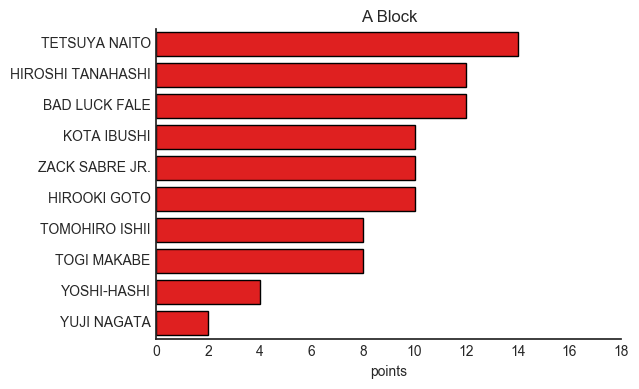

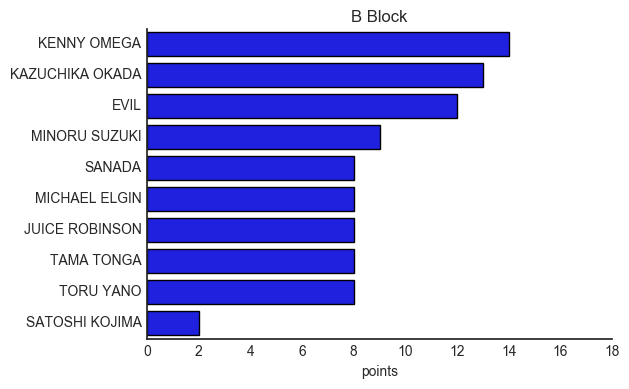

In [28]:

ax= sns.barplot(y='Wrestler', x='Points', data=A_Block, color= 'Red')
ax.set_xlim(0,18)
sns.despine()
ax.set_ylabel('')
ax.set_xlabel('points')
ax.set_title('A Block')
plt.show()
ax= sns.barplot(y='Wrestler', x='Points', data=B_Block,  color= 'Blue')
ax.set_xlim(0,18)
sns.despine()
ax.set_ylabel('') 
ax.set_xlabel('points')
ax.set_title('B Block')
plt.show()

In [69]:
data = [go.Bar(
            x=A_Block['Wrestler'],
            y=A_Block['DMR']
    )]

py.iplot(data, filename='G1 ratings')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Shan1987/0 or inside your plot.ly account where it is named 'basic-bar'


In [62]:
import plotly
plotly.__version__

'2.0.16'

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
py.iplot(table, filename='jupyter/table1')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [65]:
import plotly.figure_factory as ff

In [67]:
plotly.tools.set_credentials_file(username='Shan1987', api_key='F9FbuYKZIo2bGIo5C3LU')